In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [378]:
df2 = pd.read_excel(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\FoodHub-20231204T083224Z-001\FoodHub\foodhub_order_v2.xlsx")
df2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [379]:
df2.describe()

,order_id,customer_id,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,27.371970,24.161749
std,5.480497e+02,113698.139743,4.632481,4.972637
min,1.476547e+06,1311.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,23.000000,20.000000
50%,1.477496e+06,128600.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.000000,33.000000


Sanity check

In [380]:
df2.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [381]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               1898 non-null   int64 
 1   customer_id            1898 non-null   int64 
 2   restaurant_name        1898 non-null   object
 3   cuisine_type           1898 non-null   object
 4   cost_of_the_order      1898 non-null   object
 5   day_of_the_week        1898 non-null   object
 6   rating                 1898 non-null   object
 7   food_preparation_time  1898 non-null   int64 
 8   delivery_time          1898 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 133.6+ KB


### Delivery ###

In [382]:
df2['food_preparation_time'].mean()

27.371970495258168

In [383]:
df2['delivery_time'].mean()

24.161749209694417

Checking outliers for food prep & delivery time

<Axes: ylabel='food_preparation_time'>

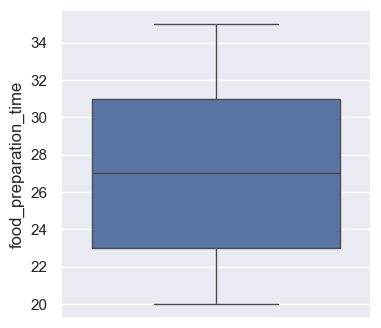

In [384]:
sns.set(rc={"figure.figsize":(4, 4)}) 
sns.boxplot(data=df2['food_preparation_time'])

<Axes: ylabel='delivery_time'>

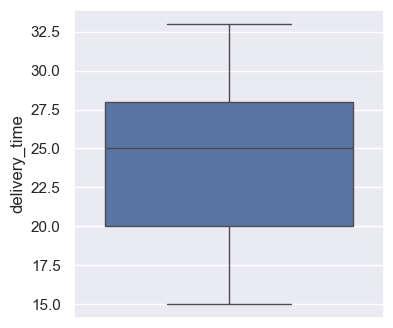

In [385]:
sns.boxplot(data=df2['delivery_time'])

Weekday & weekend ratio

In [386]:
df2['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

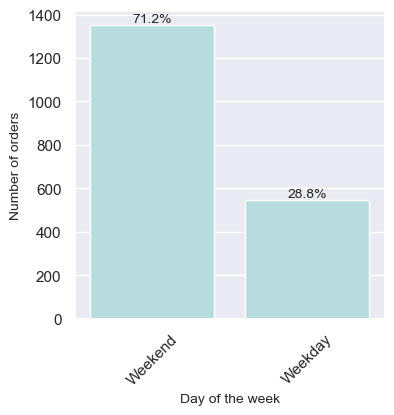

In [387]:
ax = sns.countplot(data = df2, x='day_of_the_week', color='powderblue')

total = df2['day_of_the_week'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_xlabel('Day of the week', fontdict={'size':10})
ax.set_ylabel('Number of orders', fontdict={'size': 10})

plt.show()

Create a new column as per adding the food prep & delivery

In [388]:
df2['total_delivery_time'] = df2['food_preparation_time'] + df2['delivery_time']

In [389]:
df2.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'total_delivery_time'],
      dtype='object')

In [390]:
new_cols = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'day_of_the_week', 'rating', 'cost_of_the_order',
       'food_preparation_time', 'delivery_time','total_delivery_time']


In [391]:
df2 = df2[new_cols]

Categorize them by def function

In [392]:
def total_delivery(time):
    if time > 60:
        return 'Above 60 minutes'
    elif time < 51 and time < 60:
        return 'Above average'
    else:
        return 'Below average'

In [393]:
df3 = df2.copy()

Putting the categories in new column

In [394]:
df3['delivery_data'] = df3['total_delivery_time'].apply(total_delivery)

In [395]:
df3['total_delivery_time'].mean()

51.53371970495258

Visualisation of the categories by barplot

Text(0, 0.5, 'Number of orders')

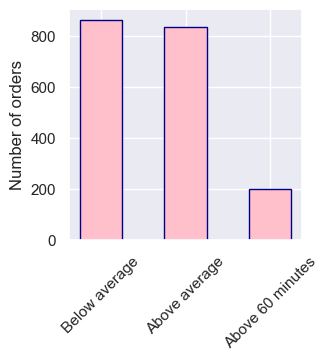

In [396]:
x = df3['delivery_data'].value_counts().index
y = df3['delivery_data'].value_counts().values

plt.figure(figsize=(3,3))
plt.bar(x,y, color='pink', width=0.5, edgecolor='darkblue', lw=1)
plt.xticks(x, rotation=45)

plt.ylabel('Number of orders')

### Cuisine ###

Visualize the cuisine type with horizontal countplot, adding percentage 

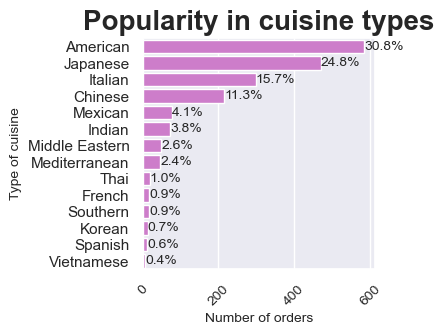

In [397]:
sns.set(rc={"figure.figsize":(3, 3)}) #width=3, #height=4

ax = sns.countplot(data=df3, y='cuisine_type', color='orchid', order=df3['cuisine_type'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10);

#plt.title('Popularity in cuisine types', fontsize=20) same as
ax.set_title('Popularity in cuisine types', fontdict={'size': 20, 'weight': 'bold'})

ax.set_xlabel('Number of orders', fontdict={'size': 10})
ax.set_ylabel('Type of cuisine', fontdict={'size': 10})

total = df2['cuisine_type'].count()

ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%', rotation=0, fontsize=10)
plt.show()

In [398]:
df3.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=True)

TypeError: agg function failed [how->mean,dtype->object]

In [399]:
avg_order = df3.groupby('cuisine_type')['cost_of_the_order'].mean()\
.reset_index()\
.rename(columns = {'cost_of_the_order':'Average_cost_of_oder'})\
.sort_values(by ='Average_cost_of_oder',ascending=False)\
.reset_index(drop=True)

TypeError: agg function failed [how->mean,dtype->object]

In [400]:
avg_order

,cuisine_type,Average_cost_of_oder
0,French,19.793889
1,Southern,19.300588
2,Thai,19.207895
3,Spanish,18.994167
4,Middle Eastern,18.820612
5,Mexican,17.031597
6,Indian,16.919726
7,Italian,16.418691
8,American,16.319829
9,Chinese,16.305209


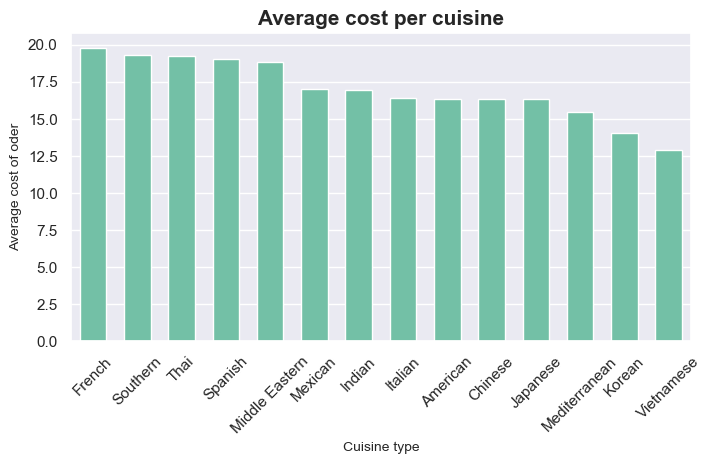

In [401]:
sns.set(rc={"figure.figsize":(8,4)})
ax= sns.barplot(data=avg_order, y='Average_cost_of_oder',
                x='cuisine_type',
                color='mediumaquamarine',width=0.6)


ax.set_title('Average cost per cuisine', fontdict={'size': 15, 'weight': 'bold'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_xlabel('Cuisine type', fontdict={'size':10})
ax.set_ylabel('Average cost of oder', fontdict={'size': 10})

plt.show()

### orders ###

In [402]:
df3.groupby('day_of_the_week')['total_delivery_time'].mean()

day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_delivery_time, dtype: float64

In [403]:
df3.groupby('customer_id')['order_id'].count().sort_values()

customer_id
1311       1
175327     1
176234     1
178172     1
178846     1
          ..
65009      7
250494     8
83287      9
47440     10
52832     13
Name: order_id, Length: 1200, dtype: int64

In [404]:
df3['customer_orders_freq'] = df3['customer_id'].map(df3['customer_id'].value_counts())

In [405]:
def order_freq(freq):
    if freq > 3:
        return 'Above 3 orders placed'
    elif freq < 3 and freq > 1:
        return 'Between 1 & 3 orders placed'
    else:
        return 'One-time customer'

In [406]:
df3['customer_orders_freq_categories'] = df3['customer_orders_freq'].apply(order_freq)

In [407]:
df3

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories
0,1477147,337525,Hangawi,Korean,Weekend,Not given,30.75,25,20,45,Above average,2,Between 1 & 3 orders placed
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,Weekend,Not given,12.08,25,23,48,Above average,1,One-time customer
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,Below average,1,One-time customer
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.2,25,15,40,Above average,2,Between 1 & 3 orders placed
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,Above average,3,One-time customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,Weekend,5,22.31,31,17,48,Above average,1,One-time customer
1894,1477421,397537,The Smile,American,Weekend,5,12.18,31,19,50,Above average,1,One-time customer
1895,1477819,35309,Blue Ribbon Sushi,Japanese,Weekday,Not given,25.22,31,24,55,Below average,2,Between 1 & 3 orders placed
1896,1477513,64151,Jack's Wife Freda,Mediterranean,Weekday,5,12.18,23,31,54,Below average,4,Above 3 orders placed


In [408]:
categories_freq = ['One-time customer', 'Between 1 & 3 orders placed', 'Above 3 orders placed']

In [409]:
values_freq = [784, 346, 66]

In [410]:
colors = ['moccasin','lightpink','lightslategrey','chocolate']

([<matplotlib.patches.Wedge at 0x221c67f7d90>,
 [Text(0.32173162129465227, -1.0518976964796123, 'One-time customer'),
  Text(-0.49835933050732245, 0.9806314178611113, 'Between 1 & 3 orders placed'),
  Text(0.8043455159408479, 1.145874465631315, 'Above 3 orders placed')],
 [Text(0.20473830446023325, -0.6693894432142987, '65.55%'),
  Text(-0.317137755777387, 0.6240381750025252, '28.93%'),
  Text(0.5745325113863199, 0.8184817611652248, '5.52%')])

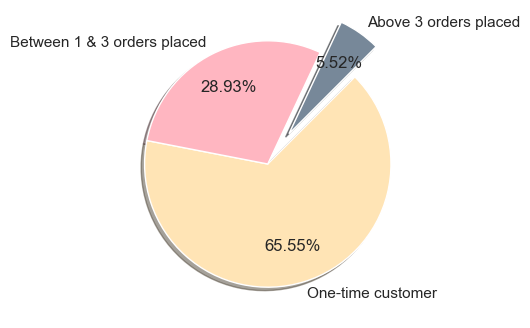

In [411]:
plt.pie(values_freq,labels=categories_freq, explode=explodes, colors=colors, autopct='%.2f%%', pctdistance=0.7, startangle=45, shadow=True, counterclock=False) 

### ratings ###

In [412]:
df3['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [413]:
df3['rating'].replace('Not given', 0, inplace=True)

In [414]:
df3['rating'] = df3['rating'].astype({'rating':'int'})

In [415]:
df3['rating'].value_counts()

rating
0    736
5    588
4    386
3    188
Name: count, dtype: int64

In [416]:
rating_rest = df3[df3['rating'] != 0]

In [417]:
rating_rest

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,cost_of_the_order,food_preparation_time,delivery_time,total_delivery_time,delivery_data,customer_orders_freq,customer_orders_freq_categories
2,1477070,66393,Cafe Habana,Mexican,Weekday,5,12.23,23,28,51,Below average,1,One-time customer
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3,29.2,25,15,40,Above average,2,Between 1 & 3 orders placed
4,1478249,76942,Dirty Bird to Go,American,Weekday,4,11.59,25,24,49,Above average,3,One-time customer
5,1477224,147468,Tamarind TriBeCa,Indian,Weekday,3,25.22,20,24,44,Above average,3,One-time customer
7,1477859,89574,Barbounia,Mediterranean,Weekday,3,5.97,33,30,63,Above 60 minutes,1,One-time customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,Weekday,3,8.68,33,30,63,Above 60 minutes,5,Above 3 orders placed
1890,1477316,164776,TAO,Japanese,Weekend,5,15.67,20,22,42,Above average,2,Between 1 & 3 orders placed
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,Weekend,5,22.31,31,17,48,Above average,1,One-time customer
1894,1477421,397537,The Smile,American,Weekend,5,12.18,31,19,50,Above average,1,One-time customer


In [418]:
rating_rest.groupby('rating')['rating'].count()

rating
3    188
4    386
5    588
Name: rating, dtype: int64

Top 5 restaurants based on order frequency

In [423]:
df3['restaurant_name'].value_counts().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

filtering on restaurants based on ratings

In [424]:
rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)[rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False) > 4].count()

110

Restaurants received ratings

In [425]:
rating_rest['restaurant_name'].nunique()

156

In [426]:
rating_rest.groupby('restaurant_name')['rating'].mean().sort_values(ascending=True).head(5)

restaurant_name
Sushi Choshi       3.0
Sarabeth's West    3.0
Pepe Giallo        3.0
brgr               3.0
Nha Trang One      3.0
Name: rating, dtype: float64

In [430]:
top5restaurants = ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']

In [431]:
above_4_rating = rating_rest[rating_rest['restaurant_name'].isin(top5restaurants)]

In [437]:
above_4_rating.groupby('restaurant_name')[['rating']].mean()\
.reset_index()\
.sort_values(by='rating', ascending=False)
#saving in another variable --> to use for pie chart

,restaurant_name,rating
4,The Meatball Shop,4.511905
0,Blue Ribbon Fried Chicken,4.328125
3,Shake Shack,4.278195
1,Blue Ribbon Sushi,4.219178
2,Parm,4.128205


In [433]:
categories_res = ['No rating', 'Between 3 & 4', "Between 4 & 5", 'Exactly 5']

In [434]:
values_res = [22, 17, 92, 47]

In [435]:
colors = ['azure', 'cadetblue', 'lightgreen', 'burlywood']

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(values_res,labels=categories_res, colors=colors, autopct='%.2f%%', pctdistance=0.5, startangle=45, shadow=True, counterclock=False, textprops={'fontsize':14})
plt.title(
    label="Overall ratings per restaurants", 
    fontdict={"fontsize":18, 'weight': 'bold'},
    pad=20)


### cost ###


In [ ]:
df3['cost_of_the_order']

Object dtype, so first converting to numeric

In [ ]:
numeric_vals = pd.to_numeric(df3['cost_of_the_order'],errors = 'coerce')

In [ ]:
numeric_vals.isnull().sum()

In [ ]:
idx = numeric_vals.isna()

In [ ]:
idx

Identification of the stray characters

In [ ]:
df3['cost_of_the_order'][idx].unique()

Converting the stray values to float

In [ ]:
df3['cost_of_the_order'] = df3['cost_of_the_order'].replace('$',np.nan)\
                            .replace('.', np.nan)\
                            .replace('1 4.02','14.02')\
                            .astype(float)


In [ ]:
df3.dtypes

In [ ]:
df3['cost_of_the_order'].mean()

Handling the nullvalues and filling them with the mean

In [ ]:
df3['cost_of_the_order'].fillna(df3['cost_of_the_order'].mean(), inplace =True)

In [ ]:
df3['cost_of_the_order'].isnull().sum()

In [ ]:
df3['cost_of_the_order'].dtype

using the resting rest - already filtered on the rated orders

In [ ]:
sns.set(rc={"figure.figsize":(4, 4)}) 
cost_ax = sns.histplot(data=df3['cost_of_the_order'], color='mediumpurple', kde=True, bins=10)
cost_ax.set_title('Order cost overview', fontdict={'size': 20, 'weight': 'bold'})
cost_ax.set_xlabel('Cost of the orders', fontdict={'size': 10})
cost_ax.set_ylabel('Frequency of the orders', fontdict={'size': 10})

In [ ]:
def order_price_categories(category):
    if category > 25:
        return 'Above 25$'
    elif category > 10 and category < 25:
        return 'Between 10$ & 25$'
    else:
        return 'Below 10$'
    
    
df3['Order price'] = df3['cost_of_the_order'].apply(order_price_categories)

In [ ]:
df3

In [ ]:
df3['Order price'].value_counts()

In [ ]:
df3

In [ ]:
df3['cost_of_the_order'].mean()

In [ ]:
df3['cost_of_the_order'].max()


In [ ]:
df3['cost_of_the_order'].min()

In [ ]:
sns.boxplot(data=df3['cost_of_the_order'])

In [ ]:
categories = ['Below 10$', 'Between 10$ & 25$', 'Above 25$']

In [ ]:
values = [456, 1190, 252]

In [ ]:
explodes = [0, 0, 0.3]

In [ ]:
plt.pie(values,labels=categories, explode=explodes, autopct='%.2f%%', pctdistance=0.7, startangle=45, counterclock=False) 